In [19]:
import pandas as pd
import numpy as np

avs = ["Ad-Aware", "AhnLab-V3", "Acronis", "Ad-Aware", "Alibaba", "ALYac", "Antiy-AVL", "Avast", "AVG", 
       "Avira (no cloud)", "BitDefender", "BitDefenderTheta", "Comodo", 
       "CrowdStrike Falcon", "Cybereason", "Cylance", "Cynet", "Cyren", "DrWeb", 
       " Elastic", "Emsisoft", "eScan", "ESET-NOD32", "Fortinet", "GData", "Ikarus", 
       "Jiangmin", "K7AntiVirus", "K7GW", "Kaspersky", "Lionic", "Malwarebytes", "MAX", 
       "McAfee", "McAfee-GW-Edition", "Microsoft", "NANO-Antivirus", "Palo Alto Networks", 
       "Panda", "QuickHeal", "Sangfor Engine Zero", "SecureAge", "SentinelOne (Static ML)", 
       "Sophos", "Symantec", "Tencent", "Trellix (FireEye)", "TrendMicro", "TrendMicro-HouseCall", 
       "VBA32", "VIPRE", "Yandex", "Zillya", "ZoneAlarm by Check Point", "Acronis (Static ML)", "Arcabit",
       "Baidu", "Bkav Pro", "ClamAV", "CMC", "Gridinsoft (no cloud)", "Kingsoft", "MaxSecure",
       "Rising", "SUPERAntiSpyware", "TACHYON", "ViRobot", "Webroot", "WithSecure", "Zoner", "Avast-Mobile", 
       "BitDefenderFalx", "Symantec Mobile Insight", "Trapmine", "Trustlook", "SuperAntiSpyware", "Security", 
       "vendors'", "analysis", "automate", "checks", "want", "you"]

def removeAllOccurenceStr(inputs, target:str):
    while (inputs.count(target)):
        inputs.remove(target) 
    return inputs

def removeAllOccurenceList(inputs, ls:list):
    for l in ls:
        ls = removeAllOccurenceStr(inputs, l.lower())
    return inputs

isnone = False
def findType1(vt:list):
    '''
    List from VirusTotal:
    ["adware","banker","downloader","dropper","fakeav","hacktool","miner","phishing","pua","ransomware","spyware","trojan","virus","worm"]
    Disregard phishing and fakeav
    '''
    types = [['trojan', 0],['adware',0],['downloader',0],['ransomware',0],['miner',0],['dropper',0],['pua',0],['virus',0],['miner',0],['undetected',0],['worm',0],['spyware',0],['banker',0]]
    for v in vt:
        if "not" not in v:
            if "troj" in v or "trj" in v:
                types[0][1] += 1
            if "adw" in v:
                types[1][1] += 1
            if "down" in v:
                types[2][1] += 1
            if "rans" in v:
                types[3][1] += 1
            if "mine" in v or "crypt" in v:
                types[4][1] += 1
            if "drop" in v:
                types[5][1] += 1
            if "pua" in v or "pup" in v or "susp" in v or "bundl" in v or "gray" in v or "grey" in v:
                types[6][1] += 1
            if ("vir" in v) and ("not-a-vi" not in v):
                types[7][1] += 1
            if "hack" in v:
                types[8][1] += 1
            if "undetected" in v:
                types[9][1] += 1
            if "worm" in v:
                types[10][1] += 1
            if "spy" in v or "backd" in v:
                types[11][1] += 1
            if "bank" in v:
                types[12][1] += 1
    # types[3][1] += int(types[3][1] * .5) # Increase ransomware by 50% due to its severity
    types[9][1] = int(types[9][1]*.05) # <=== Adjusting quantity 'undetected' to be non-invasive of other malware types.
    types.sort(key=lambda x: x[1], reverse=True)
    print(types,"\n")
    return types

filename = 'test_clustering.csv' # <== Update this to point to the <Data_Clustering>_SampleHash_Common.csv file
df = pd.read_csv(filename)
df['Type 1'] = df['Type 1'].astype('str')

In [20]:
type_1_pos = 3

for r in range(df.shape[0]):
    if(type(df.iloc[r,type_1_pos]) == str and (" " in df.iloc[r,type_1_pos] or "\n" in df.iloc[r,type_1_pos])):
        vt = df.iloc[r,type_1_pos].lower().replace(" ", "\n").split("\n")
        for v in range(len(vt)):
            vt[v] = vt[v].strip()
        vt = removeAllOccurenceList(vt, avs)
        vt = removeAllOccurenceStr(vt, "Unable to process file type".lower())
        vt.sort()
        df.iloc[r,type_1_pos] = findType1(vt)[0][0]

[['downloader', 14], ['adware', 11], ['trojan', 9], ['pua', 9], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 17], ['adware', 10], ['pua', 9], ['downloader', 1], ['dropper', 1], ['undetected', 1], ['ransomware', 0], ['miner', 0], ['virus', 0], ['miner', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 27], ['spyware', 8], ['ransomware', 3], ['miner', 3], ['pua', 1], ['adware', 0], ['downloader', 0], ['dropper', 0], ['virus', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['banker', 0]] 

[['trojan', 25], ['spyware', 8], ['pua', 2], ['virus', 1], ['adware', 0], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['miner', 0], ['undetected', 0], ['worm', 0], ['banker', 0]] 

[['pua', 12], ['trojan', 10], ['adware', 8], ['miner', 4], ['virus', 1], ['undetected', 1], ['downloader', 0], ['ransomware', 0], ['dropper', 0], ['miner', 0], ['worm', 0], ['spy

,hash,pattern,cluster,Type 1
0,e3b5f6e9725afdb530fa66d1e3a0d3cb,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp...",82,downloader
1,cc1d2aab2cff10625dbb8db58f3a59e2,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",141,trojan
2,5891839540cab1d878ddb1bab05a780f,"LdrGetDllHandle,LdrLoadDll,RegOpenKeyExA,NtAll...",7915,trojan
3,408795dfe87fb536dbecddf6ea8d8a9c,"NtAllocateVirtualMemory,SetErrorMode,LoadStrin...",1183,trojan
4,a8fa91fbfbd215d81344564ad8741693,"NtAllocateVirtualMemory,NtProtectVirtualMemory...",424,pua
...,...,...,...,...
495,2d9a079ef64c226df444d62f73a8c95a,"LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,L...",142,trojan
496,92f43605ef120de74bc3eed5857036a1,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",315,pua
497,f094d8f0fe446c58ef816d24f5950919,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",188,trojan
498,2785cad8298f921c43de25f5ab359e1e,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",8049,trojan


Type 1
trojan        396
_              31
downloader     25
pua            21
adware         20
ransomware      5
spyware         1
miner           1
Name: count, dtype: int64

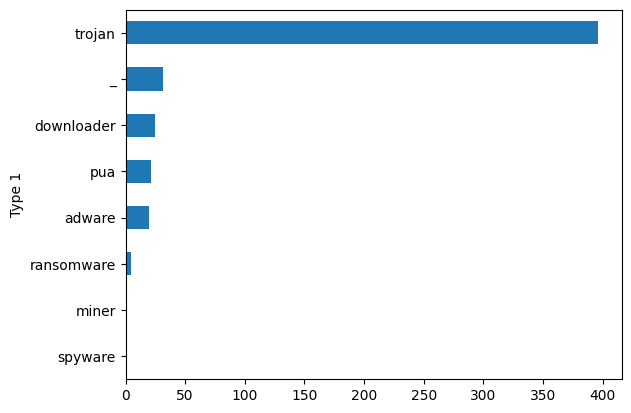

In [21]:
df.replace(to_replace='undetected', value='_', inplace=True) # <=== Replaces 'undetected' with '_'
df.replace(to_replace='nan', value='', inplace=True) # <=== Replaces 'undetected' with '_'
# if isnone:
#     df.loc[df['Type 1'].str.contains('none'), 'Type 1'] = '_'
df.to_csv('VirusTotal_Parsed.csv', index=False)
display(df)

display(df['Type 1'].value_counts(ascending=False))
df['Type 1'].value_counts(ascending=True).plot(kind='barh')

cluster = df['cluster'].unique().tolist()
for c in cluster:
    counts = df[df['cluster'] == c]['Type 1'].value_counts()